## PCGA dataset review
[2022-09-08]
[2022-10-05] create NEW CSV for taining and fixed val split.



In [98]:
!export TF_ENABLE_AUTO_MIXED_PRECISION=1

In [99]:
import os
# set log level should be before import tf, to skip "TF_ENABLE_AUTO_MIXED_PRECISION has no effect"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# INFO messages are not printed.
# This must be run before loading other modules.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


import cv2
import numpy as np
import random
from IPython.display import Markdown, display
from matplotlib import pyplot as plt
from PIL import Image

import pandas as pd

import tensorflow as tf
# import tensorflow_similarity as tfsim





In [100]:
cv2.__version__
tf.__version__

'2.6.0'

In [101]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [102]:
tf.math.add(
    2, 2, name=None
)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

### Dataset

In [103]:
# # sources
# FV_img = "PACG_fovea_centered_FV"                          #視野
# FV_val = "PACG_fovea_centered_FV_value"                    #視野值
# FD_img = "PACG_fovea_cnetered_fundus_crop"                 #眼底
# FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

# data_Dir = "~/data/PACG/"
# data_Dir = "/home/u3148947/data/PACG/"


# # sources [09-27]
# FV_img = "PACG_fovea_centered_FV"                          #視野
# FV_val = "PACG_fovea_centered_FV_value"                    #視野值
# FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
# FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

# data_Dir = "~/data/PACG_0927/"
# data_Dir = "/home/u3148947/data/PACG_0927/"


# sources [10-05]
FV_img = "POACG_crop"                          #視野
FV_val = "POACG_FV_vaule"                    #視野值
FD_img = "PACG_fovea_centered_fundus_crop"                 #眼底
FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

data_Dir = "~/data/PACG_data_20221005/"
data_Dir = "/home/u3148947/data/PACG_data_20221005/"



#### FD_cod

In [104]:
FD_cod_list = [os.path.join(data_Dir + FD_cod, file) for file in os.listdir(data_Dir + FD_cod)]
sample_FD_cod_path = random.choice(FD_cod_list) #FV_img_list[1]
# sample_FD_cod = Image.open(sample_FD_cod_path)
sample_FD_cod = open(sample_FD_cod_path).readlines()


display(Markdown("**Fundus  coordinate**"))
display(Markdown(f"*{sample_FD_cod_path}*"))
display(sample_FD_cod)

FileNotFoundError: [Errno 2] No such file or directory: '/home/u3148947/data/PACG_data_20221005/PACG_fovea_cnetered_fundus_crop_FV_referencePT'

#### FV_val

In [105]:
FV_val_list = [os.path.join(data_Dir + FV_val, file) for file in os.listdir(data_Dir + FV_val)]
sample_FV_val_path = random.choice(FV_val_list) #FV_img_list[1]
# sample_FD_cod = Image.open(sample_FD_cod_path)
# sample_FV_val = open(sample_FV_val_path).readlines()
sample_FV_val = [txt.replace("\n", "") for txt in open(sample_FV_val_path).readlines()]
# sample_FV_val.remove("") # leave last ""
sample_FV_val = [x for x in sample_FV_val if x] # remove the empty ""



# for txt in open(sample_FV_val_path).readlines():
#     txt.replace("\n", "")
#     txt.remove("")


display(Markdown("**FV value**"))
display(Markdown(f"*{sample_FV_val_path}*"))
display(sample_FV_val)

print("\n\t\t FV_val_list : ", len(FV_val_list))

**FV value**

*/home/u3148947/data/PACG_data_20221005/POACG_FV_vaule/5899597.txt*

['0,0,0,0',
 '0,0,0,0,0,0',
 '0,0,0,0,0,0,0,0',
 '0,0,0,0,0,0,0,0',
 '0,0,23,26,23,0,0,0',
 '0,0,0,0,0,0,0,0',
 '2,0,10,0,0,0',
 '2,10,5,7']


		 FV_val_list :  271


#### FV_val to array

In [106]:
sample_FV_val_arr = [x.split(",") for x in sample_FV_val]

In [107]:
sample_FV_val_arr

[['0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '23', '26', '23', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0'],
 ['2', '0', '10', '0', '0', '0'],
 ['2', '10', '5', '7']]

In [108]:
sample_FV_val_arr_one = [] #np.empty(1)
for sub_arr in sample_FV_val_arr:
    #sub_arr=np.array(sub_arr)
    print(sub_arr)
    sample_FV_val_arr_one = np.concatenate((sample_FV_val_arr_one, sub_arr))


['0', '0', '0', '0']
['0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '23', '26', '23', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['2', '0', '10', '0', '0', '0']
['2', '10', '5', '7']


In [109]:
print(sample_FV_val_arr_one, "\n shape:",sample_FV_val_arr_one.shape)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '23' '26' '23' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '2' '0' '10' '0' '0' '0' '2' '10' '5' '7'] 
 shape: (52,)


In [110]:
sample_FV_val_arr_one

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '23', '26', '23', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '2', '0', '10', '0', '0', '0', '2', '10', '5', '7'],
      dtype='<U32')

#### Get FV_val to array

In [111]:
def get_fv_value(sample_FV_val_path):
    sample_FV_val = [txt.replace("\n", "") for txt in open(sample_FV_val_path).readlines()]
    # sample_FV_val.remove("") # leave last ""
    sample_FV_val = [x for x in sample_FV_val if x] # remove the empty ""
    
    sample_FV_val_arr = [x.split(",") for x in sample_FV_val]
    
    sample_FV_val_arr_one = [] #np.empty(1)
    for sub_arr in sample_FV_val_arr:
        #sub_arr=np.array(sub_arr)
        print(sub_arr)
        #sample_FV_val_arr_one = np.concatenate((sample_FV_val_arr_one, sub_arr)) # array with block
        #sample_FV_val_arr_one.append(sub_arr)                                    # array in array with block
        sample_FV_val_arr_one += sub_arr                                          # array without block
        
    #return list(sample_FV_val_arr_one)
    return sample_FV_val_arr_one


In [112]:
# get_fv_value("/home/u3148947/data/PACG_0927/PACG_fovea_centered_FV_value/0268212.txt")

get_fv_value("/home/u3148947/data/PACG_data_20221005/POACG_FV_vaule/1084274.txt")

['0', '0', '0', '0']
['0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '3', '0', '0']
['3', '0', '0', '0', '25', '25', '0', '12']
['0', '4', '0', '0', '27', '30', '23', '20']
['0', '4', '0', '26', '24', '18']
['0', '0', '22', '22']


['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '0',
 '0',
 '3',
 '0',
 '0',
 '0',
 '25',
 '25',
 '0',
 '12',
 '0',
 '4',
 '0',
 '0',
 '27',
 '30',
 '23',
 '20',
 '0',
 '4',
 '0',
 '26',
 '24',
 '18',
 '0',
 '0',
 '22',
 '22']

### file name and FV value list

In [173]:
file_name_list = []
FV_val_list = []

for file in os.listdir(data_Dir + FV_img): #FD_img
    #print(file)
    #print(os.path.splitext(file))
    file_name =os.path.splitext(file)[0] # to remove the .jpg postfix
    file_name_list.append(file_name)
    
    
    #sample_FV_val_path = os.path.join(data_Dir + FV_val, file_name + "_FV_value.txt")
    sample_FV_val_path = os.path.join(data_Dir + FV_val, file_name + ".txt")
    FV_val_list.append(get_fv_value(sample_FV_val_path))

['0', '0', '0', '0']
['0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '3', '0', '0']
['3', '0', '0', '0', '25', '25', '0', '12']
['0', '4', '0', '0', '27', '30', '23', '20']
['0', '4', '0', '26', '24', '18']
['0', '0', '22', '22']
['3', '8', '18', '10']
['24', '23', '3', '21', '22', '23']
['20', '26', '26', '26', '24', '24', '26', '23']
['25', '14', '28', '30', '29', '28', '25', '20']
['29', '0', '10', '31', '31', '29', '28', '23']
['27', '30', '31', '30', '31', '30', '29', '26']
['23', '27', '27', '29', '29', '25']
['28', '27', '25', '24']
['27', '21', '27', '26']
['28', '28', '27', '29', '29', '25']
['30', '29', '26', '27', '29', '30', '27', '26']
['28', '18', '30', '30', '28', '28', '29', '25']
['25', '0', '30', '32', '32', '30', '27', '26']
['26', '28', '29', '30', '31', '29', '27', '23']
['28', '29', '29', '28', '29', '27']
['29', '26', '27', '27']
['24', '23', '26', '26']
['24', '27', '26', '28', '27', '25']
['25', '28', '28', '30'

In [174]:
print(f"file_name_list {len(file_name_list)}")
print(f"FV_val_list {len(FV_val_list)}")

file_name_list 271
FV_val_list 271


In [175]:
!ls /home/u3148947/data/PACG_0927/PACG_fovea_cnetered_fundus_crop

ls: cannot access '/home/u3148947/data/PACG_0927/PACG_fovea_cnetered_fundus_crop': No such file or directory


In [176]:
file_name_list

['1084274',
 '3602493_L',
 '3167782_L',
 '5571582_R',
 '6762842_R',
 '6206707_L',
 '2324648',
 '2836529_L',
 '4033579',
 '0975840',
 '2024246',
 '6009621',
 '5296424_L',
 '3209248',
 '3662641',
 '1944844',
 '6247591',
 '1543372',
 '2099276',
 '3602493',
 '4590522',
 '4523103',
 '5899597',
 '6348655',
 '2955076',
 '1545959',
 '5062406',
 '1656953',
 '6684115',
 '5306117_L',
 '5104318',
 '3535266',
 '3167782',
 '2189343',
 '2522270',
 '6776449_L',
 '5273461',
 '5785071',
 '5847664',
 '6673695',
 '3631303',
 '2376139',
 '6625382',
 '2217330',
 '8011072_L',
 '1902376',
 '1523825_R',
 '2103514_L',
 '2836529',
 '5450043',
 '3373131',
 '0923394',
 '2793171',
 '5571582',
 '8011072',
 '2216002_R',
 '2189343_L',
 '0836974',
 '3927274_R',
 '6690934_L',
 '5104318_L',
 '5012674',
 '2913351',
 '5132437',
 '3390549',
 '2192258',
 '2907064_L',
 '3310379',
 '5160120',
 '2815145_L',
 '4509932',
 '0268212',
 '3909901',
 '6550147',
 '3535266_R',
 '2911102',
 '5024197',
 '3784286',
 '2842546',
 '1935572',


In [177]:
file_name_list[0]
FV_val_list[0]

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '0',
 '0',
 '3',
 '0',
 '0',
 '0',
 '25',
 '25',
 '0',
 '12',
 '0',
 '4',
 '0',
 '0',
 '27',
 '30',
 '23',
 '20',
 '0',
 '4',
 '0',
 '26',
 '24',
 '18',
 '0',
 '0',
 '22',
 '22']

In [178]:
print(FV_val_list[0])

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '3', '0', '0', '0', '25', '25', '0', '12', '0', '4', '0', '0', '27', '30', '23', '20', '0', '4', '0', '26', '24', '18', '0', '0', '22', '22']


### FD image (croped)

Image size: (1024, 1024)


**Fundus  view**

*/home/u3148947/data/PACG_data_20221005/PACG_fovea_centered_fundus_crop/6502650_L.jpg*

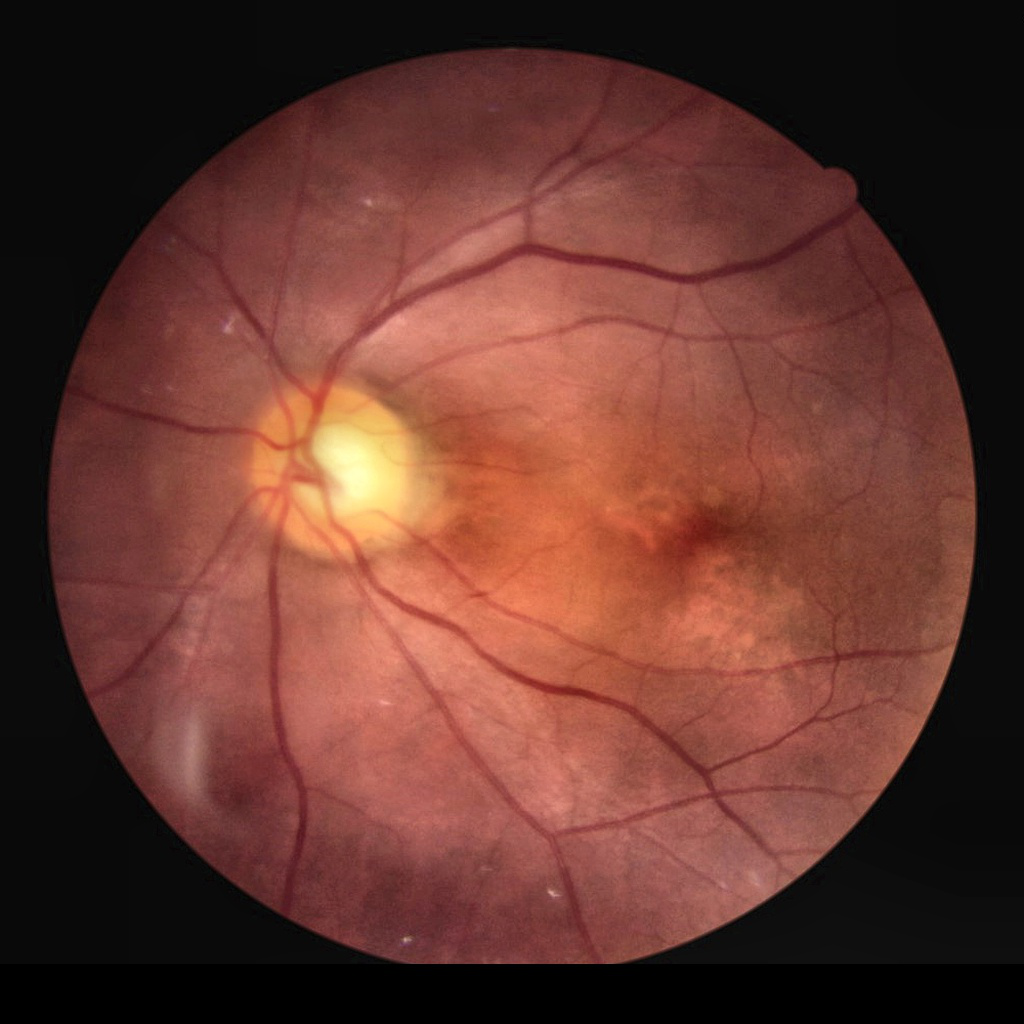

In [179]:
FD_img_list = [os.path.join(data_Dir + FD_img, file) for file in os.listdir(data_Dir + FD_img)]
sample_FD_img_path = random.choice(FD_img_list) #FV_img_list[1]
sample_FD_img = Image.open(sample_FD_img_path)

print(f"Image size: {sample_FD_img.size}")

display(Markdown("**Fundus  view**"))
display(Markdown(f"*{sample_FD_img_path}*"))
display(sample_FD_img)

**Field view**

*/home/u3148947/data/PACG_data_20221005/POACG_crop/3595202_L.jpg*

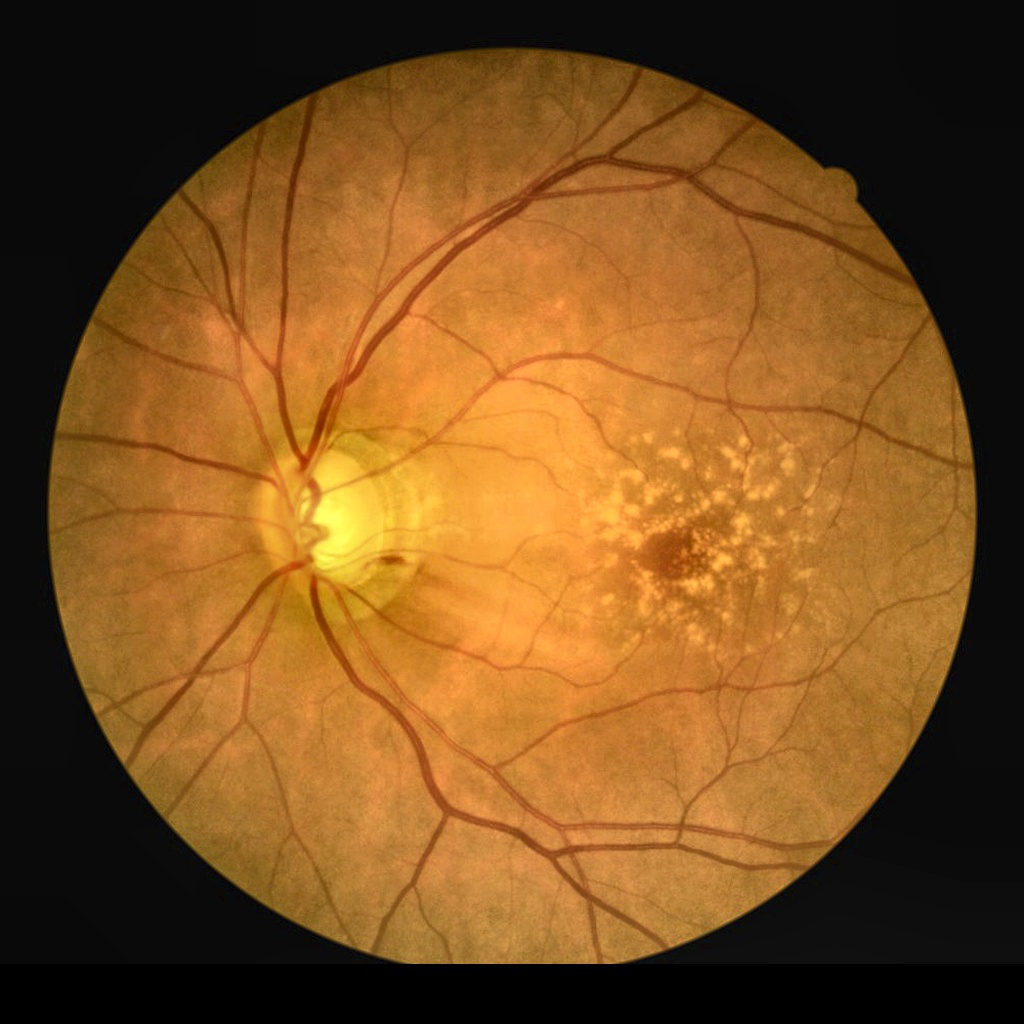

In [119]:
# FV_img_list = os.listdir(data_Dir + FV_img)
FV_img_list = [os.path.join(data_Dir + FV_img, file) for file in os.listdir(data_Dir + FV_img)]
sample_FV_img_path = random.choice(FV_img_list) #FV_img_list[1]
sample_FV_img = Image.open(sample_FV_img_path)

display(Markdown("**Field view**"))
display(Markdown(f"*{sample_FV_img_path}*"))
display(sample_FV_img)

In [120]:
!ls ~/data/PACG/PACG_fovea_centered_FV

0409018_FV.png	1944844_FV.png	  3383522_FV.png  4509932_FV.png
0542512_FV.png	1944844_L_FV.png  3931845_FV.png  4509932_L_FV.png
1861019_VF.jpg	2743854_FV.jpg	  4389721_FV.png  5785071_FV.jpg


#### FD_cod on FD_img

In [121]:

FD_cod_sample_1 = "0409018.txt"
FD_img_sample_1 = "0409018.jpg"

FD_cod_sample_1 = os.path.join(data_Dir + FD_cod,  FD_cod_sample_1)
FD_cod_sample_1 = [ cord.replace("\n", "") for cord in open(FD_cod_sample_1).readlines()]


display(Markdown("**Fundus  coordinate**"))
display(Markdown(f"*{FD_cod_sample_1}*"))
display(FD_cod_sample_1)

# x,y = FD_cod_sample_1[0][:]

FileNotFoundError: [Errno 2] No such file or directory: '/home/u3148947/data/PACG_data_20221005/PACG_fovea_cnetered_fundus_crop_FV_referencePT/0409018.txt'

In [ ]:
FD_cod_sample_1[0].split(",")

In [ ]:
disc_x,disc_y = FD_cod_sample_1[0].split(",")

In [ ]:
disc_x,disc_y

In [ ]:
macu_x,macu_y = FD_cod_sample_1[1].split(",")

In [122]:
macu_x,macu_y 

NameError: name 'macu_x' is not defined

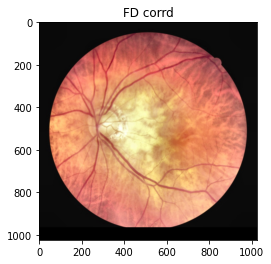

In [123]:
FD_img_sample_1 = os.path.join(data_Dir + FD_img,  FD_img_sample_1)
FD_img_sample_1 = cv2.imread(FD_img_sample_1)
FD_img_sample_1 = cv2.cvtColor(FD_img_sample_1, cv2.COLOR_BGR2RGB)

plt.imshow(FD_img_sample_1)
plt.title('FD corrd')
plt.show()

In [124]:
#Draw a red circle with zero radius and -1 for filled circle
FD_img_sample_1_point = cv2.circle(FD_img_sample_1, (int(disc_x),int(disc_y)), radius=10, color=(0, 0, 255), thickness=-1)
FD_img_sample_1_point = cv2.circle(FD_img_sample_1, (int(macu_x),int(macu_y)), radius=10, color=(255, 0, 0), thickness=-1)

#Draw a marker on image
FD_img_sample_1_point = cv2.drawMarker(FD_img_sample_1, (int(disc_x),int(disc_y)), markerType=0, markerSize=80, color=(0, 0, 255), thickness=6)
FD_img_sample_1_point = cv2.drawMarker(FD_img_sample_1, (int(macu_x),int(macu_y)), markerType=0, markerSize=80, color=(255, 0, 0), thickness=6)

NameError: name 'disc_x' is not defined

In [125]:
plt.imshow(FD_img_sample_1_point)
plt.title('FD corrd point')
plt.show()

NameError: name 'FD_img_sample_1_point' is not defined

# Create dataset CSV for training
    * read image path and FV_vale to a single CSV
    * tfdata made from above pd csv

In [180]:
# # all value mix in to one column
# df_img_value = pd.DataFrame({'filename': file_name_list,
#                              'fv_value': FV_val_list})
# df_img_value.to_csv("FV_image_value.csv", index=False)

In [181]:
# create columns name
for col in range(1,53):
    print(f" 'fv_{col}',")

 'fv_1',
 'fv_2',
 'fv_3',
 'fv_4',
 'fv_5',
 'fv_6',
 'fv_7',
 'fv_8',
 'fv_9',
 'fv_10',
 'fv_11',
 'fv_12',
 'fv_13',
 'fv_14',
 'fv_15',
 'fv_16',
 'fv_17',
 'fv_18',
 'fv_19',
 'fv_20',
 'fv_21',
 'fv_22',
 'fv_23',
 'fv_24',
 'fv_25',
 'fv_26',
 'fv_27',
 'fv_28',
 'fv_29',
 'fv_30',
 'fv_31',
 'fv_32',
 'fv_33',
 'fv_34',
 'fv_35',
 'fv_36',
 'fv_37',
 'fv_38',
 'fv_39',
 'fv_40',
 'fv_41',
 'fv_42',
 'fv_43',
 'fv_44',
 'fv_45',
 'fv_46',
 'fv_47',
 'fv_48',
 'fv_49',
 'fv_50',
 'fv_51',
 'fv_52',


In [182]:
# what is our value list
[v for v in FV_val_list[0]]

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '0',
 '0',
 '3',
 '0',
 '0',
 '0',
 '25',
 '25',
 '0',
 '12',
 '0',
 '4',
 '0',
 '0',
 '27',
 '30',
 '23',
 '20',
 '0',
 '4',
 '0',
 '26',
 '24',
 '18',
 '0',
 '0',
 '22',
 '22']

In [183]:
len(FV_val_list)

271

In [184]:
len(FV_val_list[0])

52

In [185]:
# and name list
[n for n in file_name_list]

['1084274',
 '3602493_L',
 '3167782_L',
 '5571582_R',
 '6762842_R',
 '6206707_L',
 '2324648',
 '2836529_L',
 '4033579',
 '0975840',
 '2024246',
 '6009621',
 '5296424_L',
 '3209248',
 '3662641',
 '1944844',
 '6247591',
 '1543372',
 '2099276',
 '3602493',
 '4590522',
 '4523103',
 '5899597',
 '6348655',
 '2955076',
 '1545959',
 '5062406',
 '1656953',
 '6684115',
 '5306117_L',
 '5104318',
 '3535266',
 '3167782',
 '2189343',
 '2522270',
 '6776449_L',
 '5273461',
 '5785071',
 '5847664',
 '6673695',
 '3631303',
 '2376139',
 '6625382',
 '2217330',
 '8011072_L',
 '1902376',
 '1523825_R',
 '2103514_L',
 '2836529',
 '5450043',
 '3373131',
 '0923394',
 '2793171',
 '5571582',
 '8011072',
 '2216002_R',
 '2189343_L',
 '0836974',
 '3927274_R',
 '6690934_L',
 '5104318_L',
 '5012674',
 '2913351',
 '5132437',
 '3390549',
 '2192258',
 '2907064_L',
 '3310379',
 '5160120',
 '2815145_L',
 '4509932',
 '0268212',
 '3909901',
 '6550147',
 '3535266_R',
 '2911102',
 '5024197',
 '3784286',
 '2842546',
 '1935572',


In [186]:
len(FV_val_list)

271

In [187]:
# check every FV_lal is 52
for n in FV_val_list:
    print(len(n))

52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52


In [188]:
# testing how to convert string list to int
FV_val_list_int = [int(v) for v in FV_val_list[0]]
FV_val_list_int

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 25,
 25,
 0,
 12,
 0,
 4,
 0,
 0,
 27,
 30,
 23,
 20,
 0,
 4,
 0,
 26,
 24,
 18,
 0,
 0,
 22,
 22]

In [189]:
# Check every FV_val is 52

for n,v in zip(file_name_list,FV_val_list): # here, n=str, v=int
    v = [int(vv) for vv in v]
    if len(v)!=52:
        print(n,len(v))   

"""
3033143 53
將其中一個0值刪除即可
"""

'\n3033143 53\n將其中一個0值刪除即可\n'

In [190]:
data_n_v = []


# for v in FV_val_list:
#     for n in file_name_list:
#         print(n,v)   


for n,v in zip(file_name_list,FV_val_list): # here, n=str, v=int
    v = [int(vv) for vv in v]
    print(n,v)   
    joint_list_n_v = [n] + v
    data_n_v.append(joint_list_n_v)

print()
print(data_n_v)

1084274 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 25, 25, 0, 12, 0, 4, 0, 0, 27, 30, 23, 20, 0, 4, 0, 26, 24, 18, 0, 0, 22, 22]
3602493_L [3, 8, 18, 10, 24, 23, 3, 21, 22, 23, 20, 26, 26, 26, 24, 24, 26, 23, 25, 14, 28, 30, 29, 28, 25, 20, 29, 0, 10, 31, 31, 29, 28, 23, 27, 30, 31, 30, 31, 30, 29, 26, 23, 27, 27, 29, 29, 25, 28, 27, 25, 24]
3167782_L [27, 21, 27, 26, 28, 28, 27, 29, 29, 25, 30, 29, 26, 27, 29, 30, 27, 26, 28, 18, 30, 30, 28, 28, 29, 25, 25, 0, 30, 32, 32, 30, 27, 26, 26, 28, 29, 30, 31, 29, 27, 23, 28, 29, 29, 28, 29, 27, 29, 26, 27, 27]
5571582_R [24, 23, 26, 26, 24, 27, 26, 28, 27, 25, 25, 28, 28, 30, 29, 27, 22, 21, 24, 28, 30, 31, 7, 9, 24, 26, 17, 26, 21, 22, 30, 0, 0, 23, 13, 20, 17, 27, 26, 25, 1, 23, 16, 16, 27, 27, 27, 26, 20, 23, 26, 26]
6762842_R [0, 14, 13, 13, 0, 0, 0, 22, 26, 28, 0, 0, 0, 0, 22, 23, 26, 28, 0, 0, 0, 26, 27, 27, 10, 26, 0, 0, 0, 28, 28, 26, 0, 26, 3, 3, 21, 25, 27, 26, 27, 24, 17, 24, 26, 26

In [191]:
# one value for one column

# initialize list of lists
#data_n_v

# Create the pandas DataFrame
df = pd.DataFrame(data_n_v, columns=['filename', 'fv_1',
 'fv_2',
 'fv_3',
 'fv_4',
 'fv_5',
 'fv_6',
 'fv_7',
 'fv_8',
 'fv_9',
 'fv_10',
 'fv_11',
 'fv_12',
 'fv_13',
 'fv_14',
 'fv_15',
 'fv_16',
 'fv_17',
 'fv_18',
 'fv_19',
 'fv_20',
 'fv_21',
 'fv_22',
 'fv_23',
 'fv_24',
 'fv_25',
 'fv_26',
 'fv_27',
 'fv_28',
 'fv_29',
 'fv_30',
 'fv_31',
 'fv_32',
 'fv_33',
 'fv_34',
 'fv_35',
 'fv_36',
 'fv_37',
 'fv_38',
 'fv_39',
 'fv_40',
 'fv_41',
 'fv_42',
 'fv_43',
 'fv_44',
 'fv_45',
 'fv_46',
 'fv_47',
 'fv_48',
 'fv_49',
 'fv_50',
 'fv_51',
 'fv_52',
])

df.to_csv("FV_image_value_1005.csv", index=False)


In [192]:
df_img_value = df

In [193]:
df_img_value #.head()

,filename,fv_1,fv_2,fv_3,fv_4,fv_5,fv_6,fv_7,fv_8,fv_9,...,fv_43,fv_44,fv_45,fv_46,fv_47,fv_48,fv_49,fv_50,fv_51,fv_52
0,1084274,0,0,0,0,0,0,0,0,0,...,0,4,0,26,24,18,0,0,22,22
1,3602493_L,3,8,18,10,24,23,3,21,22,...,23,27,27,29,29,25,28,27,25,24
2,3167782_L,27,21,27,26,28,28,27,29,29,...,28,29,29,28,29,27,29,26,27,27
3,5571582_R,24,23,26,26,24,27,26,28,27,...,16,16,27,27,27,26,20,23,26,26
4,6762842_R,0,14,13,13,0,0,0,22,26,...,17,24,26,26,29,28,24,23,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,5685041_L,0,0,0,0,2,0,0,0,0,...,16,22,21,25,23,24,12,17,20,19
267,6684115_L,27,27,26,26,30,28,28,28,28,...,25,29,30,24,24,0,28,26,23,19
268,5024197_L,25,24,24,23,22,26,24,25,27,...,28,27,27,26,26,21,24,26,24,27
269,2277290,18,20,15,16,18,19,23,18,14,...,28,27,25,23,22,19,25,26,26,26


In [194]:
df_img_value['filename'][0]

'1084274'

In [195]:
df_img_value['fv_52'][0]

22

In [196]:
# len(df_img_value['fv_value'][0])

In [197]:
# df_img_value['fv_value'][0]

In [198]:
# df_img_value['fv_value']

## split CSV to (1) train.csv and (2) fixed val.csv by image_list.txt


In [199]:
val_list = [txt.replace("\n", "") for txt in open("img_list.txt").readlines()]
print(f"val_list: {val_list}")

val_name_list = [x.split("_merged.jpg")[0] for x in val_list]
print(f"val_name_list: {val_name_list}")

val_list: ['1342399_L_merged.jpg', '1310627_R_merged.jpg', '4475746_R_merged.jpg', '0268212_merged.jpg', '1935572_L_merged.jpg', '1545959_merged.jpg', '3602493_merged.jpg', '3407174_merged.jpg', '0849116_L_merged.jpg', '5012674_merged.jpg', '2907064_L_merged.jpg', '4154541_merged.jpg', '3310379_merged.jpg', '3001867_merged.jpg', '1935572_merged.jpg', '4154541_L_merged.jpg', '2815145_L_merged.jpg', '3806920_merged.jpg', '3602493_L_merged.jpg', '3321454_L_merged.jpg', '2815145_merged.jpg', '3167782_merged.jpg', '2216002_R_merged.jpg', '2987599_merged.jpg', '2216002_merged.jpg', '2376139_R_merged.jpg', '2099276_merged.jpg']
val_name_list: ['1342399_L', '1310627_R', '4475746_R', '0268212', '1935572_L', '1545959', '3602493', '3407174', '0849116_L', '5012674', '2907064_L', '4154541', '3310379', '3001867', '1935572', '4154541_L', '2815145_L', '3806920', '3602493_L', '3321454_L', '2815145', '3167782', '2216002_R', '2987599', '2216002', '2376139_R', '2099276']


In [206]:
# print(df['filename'].where(df['filename'] != "1342399_L"))

0        1084274
1      3602493_L
2      3167782_L
3      5571582_R
4      6762842_R
         ...    
266    5685041_L
267    6684115_L
268    5024197_L
269      2277290
270    6670722_L
Name: filename, Length: 271, dtype: object


In [211]:
# To select rows whose column value equals a scalar, some_value, use ==:
df.loc[df['filename'] == "1342399_L"]

# Combine multiple conditions with &:
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]


# When values is a dict, we can pass values to check for each column separately:
# its more beautiful than df.loc[df['filename'].isin(val_name_list)]
# df.isin({'filename': [0, 3]})


,filename,fv_1,fv_2,fv_3,fv_4,fv_5,fv_6,fv_7,fv_8,fv_9,...,fv_43,fv_44,fv_45,fv_46,fv_47,fv_48,fv_49,fv_50,fv_51,fv_52
153,1342399_L,17,15,17,20,22,23,23,23,24,...,20,24,23,24,23,24,24,24,20,21


In [214]:
# To select rows whose column value is in an iterable, some_values, use isin: isin(*list*)
val_df = df.loc[df['filename'].isin(val_name_list)]

val_df.to_csv("FV_image_value_1005_val.csv", index=False)

In [216]:
val_df.head(27)

,filename,fv_1,fv_2,fv_3,fv_4,fv_5,fv_6,fv_7,fv_8,fv_9,...,fv_43,fv_44,fv_45,fv_46,fv_47,fv_48,fv_49,fv_50,fv_51,fv_52
1,3602493_L,3,8,18,10,24,23,3,21,22,...,23,27,27,29,29,25,28,27,25,24
18,2099276,20,11,16,0,18,21,21,4,4,...,22,26,24,26,26,4,21,21,19,19
19,3602493,19,18,22,21,18,21,24,25,24,...,24,26,27,27,26,24,21,25,24,19
25,1545959,21,23,19,26,29,29,29,25,27,...,30,30,30,25,26,26,26,24,19,22
32,3167782,11,14,0,0,24,12,12,8,0,...,27,27,29,28,30,28,26,27,26,29
55,2216002_R,30,28,28,30,31,31,31,30,29,...,31,31,30,31,29,30,30,30,30,30
61,5012674,28,26,24,22,29,29,29,27,27,...,24,30,30,28,29,27,27,27,29,28
66,2907064_L,22,22,21,20,26,24,22,23,22,...,26,28,25,26,27,25,26,24,23,23
67,3310379,18,21,19,16,21,25,23,20,21,...,21,24,27,27,27,26,20,26,20,20
69,2815145_L,23,5,25,21,14,20,21,22,25,...,23,29,19,13,14,25,15,14,12,23


In [217]:
# drop rows isin list (" ~ " to reverse the results)
train_df = df.loc[~df['filename'].isin(val_name_list)]

train_df.to_csv("FV_image_value_1005_train.csv", index=False)

In [218]:
train_df

,filename,fv_1,fv_2,fv_3,fv_4,fv_5,fv_6,fv_7,fv_8,fv_9,...,fv_43,fv_44,fv_45,fv_46,fv_47,fv_48,fv_49,fv_50,fv_51,fv_52
0,1084274,0,0,0,0,0,0,0,0,0,...,0,4,0,26,24,18,0,0,22,22
2,3167782_L,27,21,27,26,28,28,27,29,29,...,28,29,29,28,29,27,29,26,27,27
3,5571582_R,24,23,26,26,24,27,26,28,27,...,16,16,27,27,27,26,20,23,26,26
4,6762842_R,0,14,13,13,0,0,0,22,26,...,17,24,26,26,29,28,24,23,27,27
5,6206707_L,21,19,23,20,25,23,23,22,21,...,26,24,23,24,25,19,23,24,24,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,5685041_L,0,0,0,0,2,0,0,0,0,...,16,22,21,25,23,24,12,17,20,19
267,6684115_L,27,27,26,26,30,28,28,28,28,...,25,29,30,24,24,0,28,26,23,19
268,5024197_L,25,24,24,23,22,26,24,25,27,...,28,27,27,26,26,21,24,26,24,27
269,2277290,18,20,15,16,18,19,23,18,14,...,28,27,25,23,22,19,25,26,26,26


### How to efficiently use a tf.data.Dataset made of ordereddict?

In [145]:
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(df_img_value['filename'])
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(df_img_value['fv_value'][0])
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices((df_img_value['filename'], df_img_value['fv_value']))

# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(dict(df_img_value))

# 尚解不出可行模式 包成OrderedDict後 數值無法讀出
# FV_img_value_slices = tf.data.experimental.make_csv_dataset("FV_image_value.csv", batch_size=1, select_columns=["filename","fv_value"], label_name="fv_value",)
FV_img_value_slices = tf.data.experimental.make_csv_dataset("FV_image_value.csv", batch_size=1)#, select_columns=["filename","fv_value"], label_name="fv_value",)


for feature_batch in FV_img_value_slices.take(1):
    # check OrderedDict
    print(feature_batch)
    print()
    
    print(feature_batch['filename'])
    print(feature_batch['fv_value'])
    print()
    
    tf.print(feature_batch['filename'])
    tf.print(feature_batch['fv_value'])
    print()
    
#     for key, value in zip(feature_batch[0]['filename'],feature_batch[1]):
#         print("  {} <:::> {}".format(key, value))

#     for key, value in feature_batch.items(): # just check item name not the value
#         print(f'  {key}, {value}')
#         print(type(key), type(value))
        
#     for key, value in feature_batch:
#         print(f'  {key}, {value}')
#         print(type(key), type(value))

ValueError: No files match FV_image_value.csv.

In [146]:
features, label = next(iter(FV_img_value_slices))

features

NameError: name 'FV_img_value_slices' is not defined

In [147]:
# features['filename'].numpy()
features[:]

NameError: name 'features' is not defined

In [148]:
label

NameError: name 'label' is not defined

In [149]:
FV_img_value_slices

NameError: name 'FV_img_value_slices' is not defined

In [150]:
FV_img_value_slices.element_spec

NameError: name 'FV_img_value_slices' is not defined

In [151]:
type(FV_img_value_slices)

NameError: name 'FV_img_value_slices' is not defined

In [152]:
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(dict(df_img_value))


# for feature_batch in titanic_slices.take(1):
#     for key, value in feature_batch.items():
# #         print("  {!r:20s}: {}".format(key, value))
#         print("  {}: {}".format(key, value))

In [153]:
def process_path(fn, fv):
    #label = tf.strings.split(file_path, os.sep)[-2]

    print(f'fn== {fn.values()} ---\n fv== {fv}')
#     print(fn['filename'])
#     filename = fn + ".jpg"
#     file_path = os.path.join(data_Dir + FD_img, filename)
#     print(file_path)

#     return tf.io.read_file(file_path), fv
    return 0

FV_ds = FV_img_value_slices.map(process_path)

NameError: name 'FV_img_value_slices' is not defined

In [154]:
for image_raw, label_text in FV_img_value_slices.take(1):
    print(repr(image_raw.numpy()[:100]))
    print()
    print(label_text.numpy())

NameError: name 'FV_img_value_slices' is not defined

## Regression model

In [ ]:
# !cp tf.ds.pipeline/foot_plantar/facial-keypoints/Assignment-2-LSW-20220914-PCGA.ipynb .

In [ ]:
"""
move to "Assignment-2-LSW-20220914-PCGA.ipynb"
"""

### Evaluation of model